In [2]:
import pandas as pd

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\reshm\\Downloads\\Road Accident Data.csv")

In [4]:
# Display the first few rows of the dataset
print(data.head())

  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                None  ...   
1               Daylight     Kensington and Chelsea 

In [5]:
# Check for missing values
print(data.isnull().sum())

Accident_Index                   0
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              3
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
Vehicle_Type                     0
dtype: int64


In [6]:
# Drop rows with missing values in critical columns (if any)
data = data.dropna(subset=['Road_Surface_Conditions', 'Weather_Conditions', 'Time', 'Latitude', 'Longitude'])


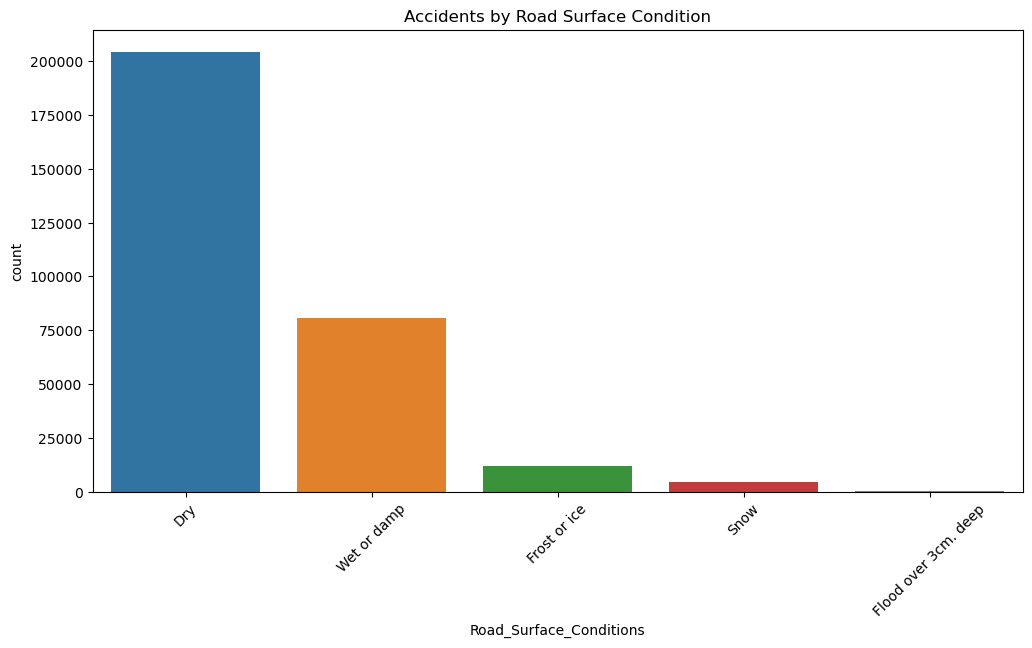

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accident counts by road surface condition
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Surface_Conditions', data=data)
plt.title('Accidents by Road Surface Condition')
plt.xticks(rotation=45)
plt.show()


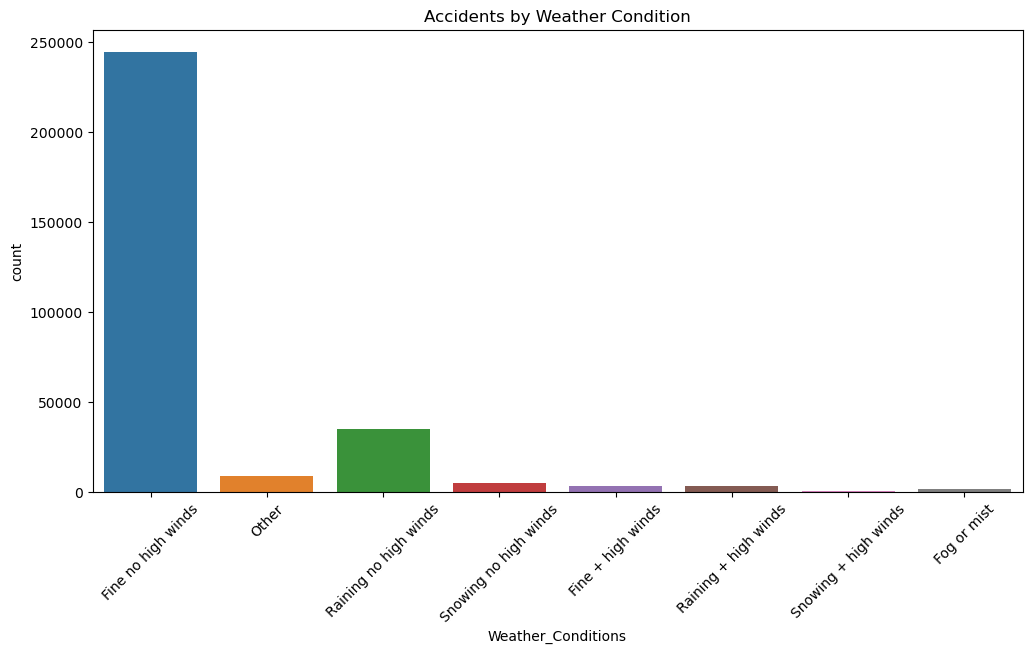

In [8]:
# Plot accident counts by weather condition
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Conditions', data=data)
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.show()


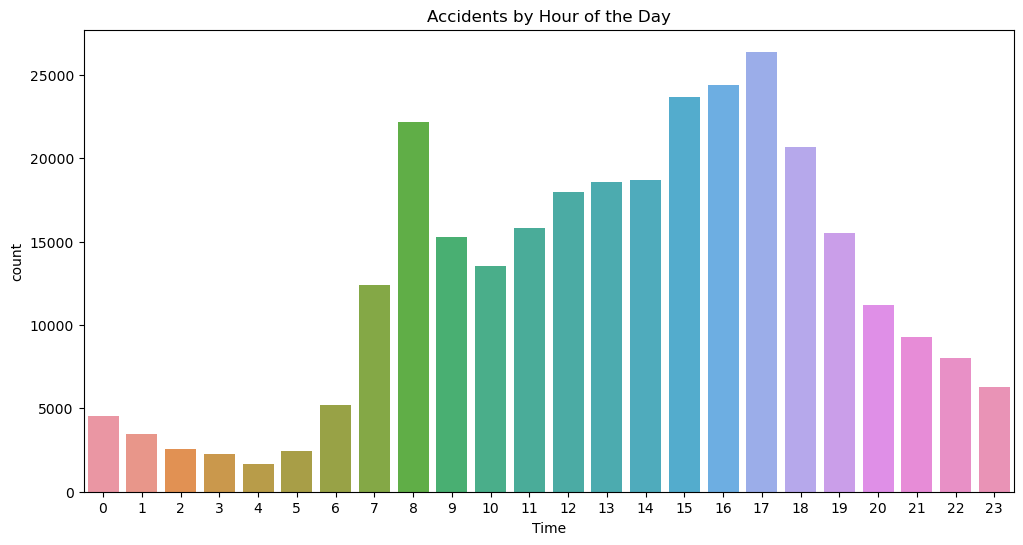

In [9]:
# Extract hour from the Time column
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Plot accident counts by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=data)
plt.title('Accidents by Hour of the Day')
plt.show()


In [14]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the mean latitude and longitude
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)

# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(accident_map)



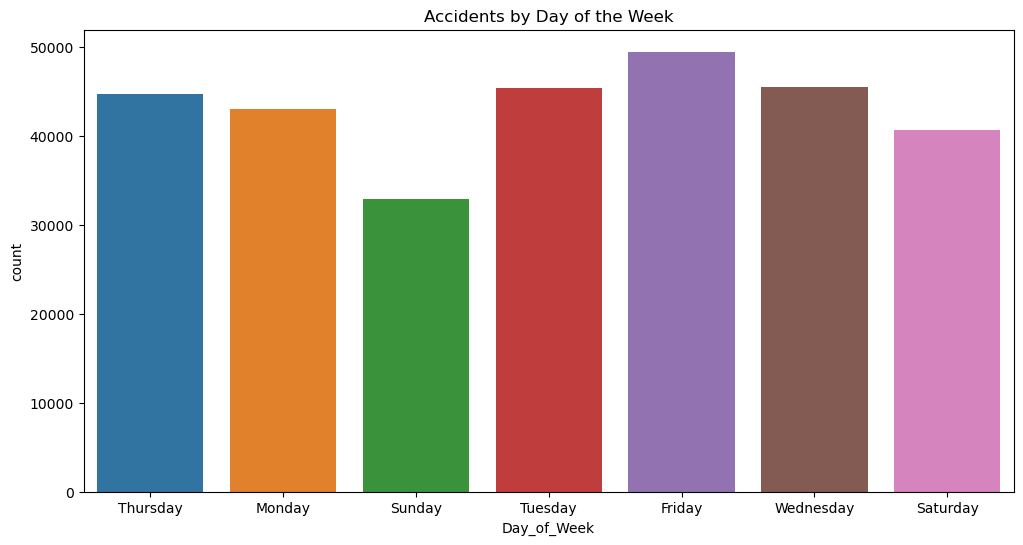

In [15]:
# Plot accident counts by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', data=data)
plt.title('Accidents by Day of the Week')
plt.show()


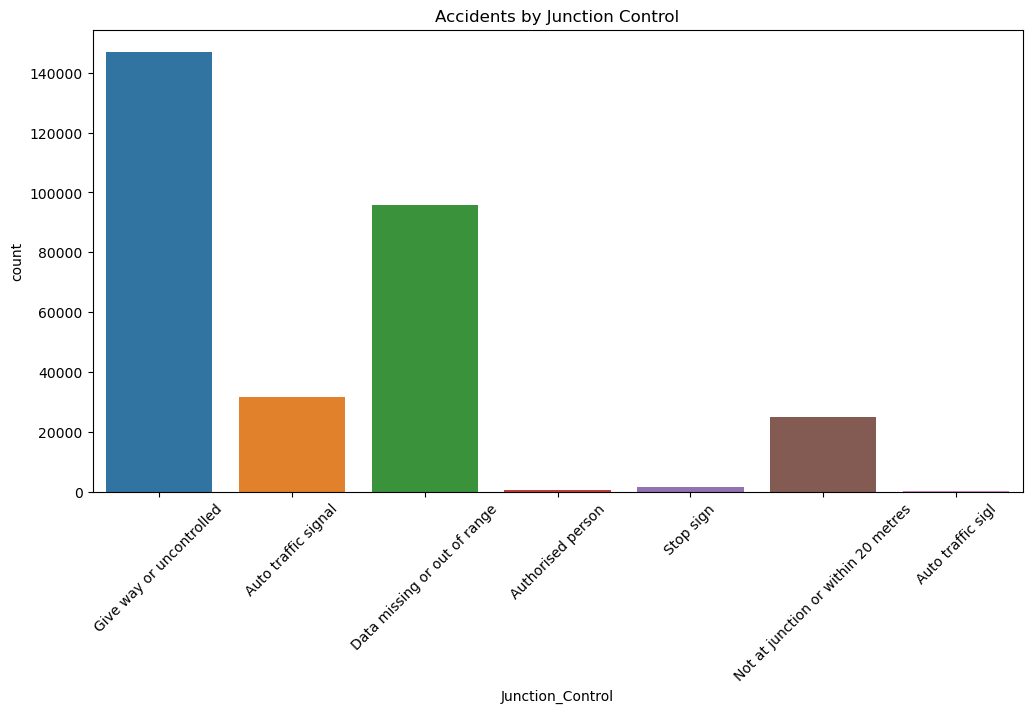

In [16]:
# Plot accident counts by junction control
plt.figure(figsize=(12, 6))
sns.countplot(x='Junction_Control', data=data)
plt.title('Accidents by Junction Control')
plt.xticks(rotation=45)
plt.show()


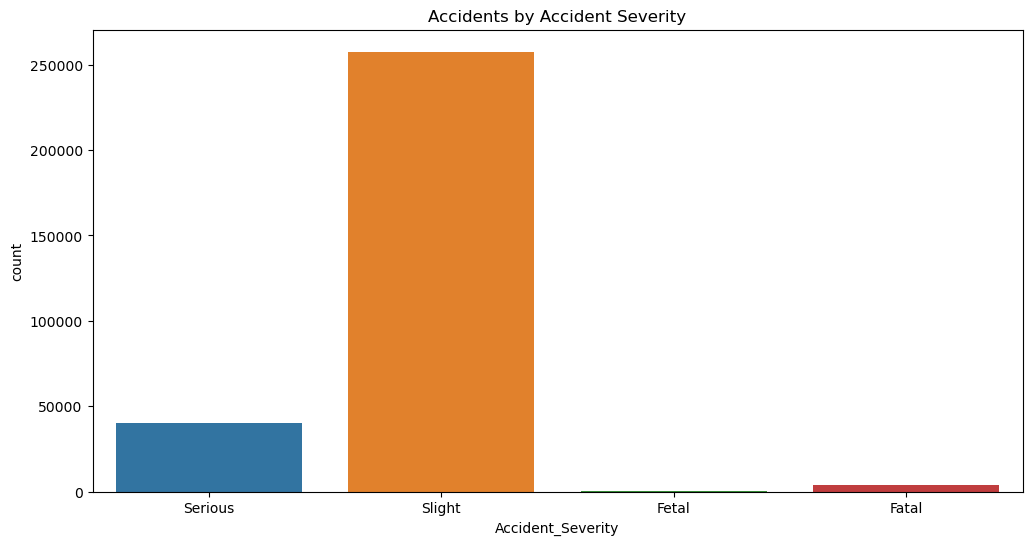

In [17]:
# Plot accident counts by accident severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Accident_Severity', data=data)
plt.title('Accidents by Accident Severity')
plt.show()
